In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
train_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_train.csv')
train_y=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_train.csv')
test_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_test.csv')
test_y=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_test.csv')

In [10]:
# 3. GridSearchCV를 사용한 하이퍼파라미터 튜닝
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [11]:
# 3 의사 결정 트리 회귀 모델 학습

best_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                        param_grid=param_grid,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1)


In [12]:
best_tree.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [13]:
# 최적의 하이퍼파라미터를 사용한 모델
best_dtree = best_tree.best_estimator_

In [14]:
# 4. 모델 학습

best_dtree.fit(train_X, train_y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [15]:
# 모델 평가 (RMSE)

predictions=best_dtree.predict(test_X)
rmse=np.sqrt(mean_squared_error(test_y,predictions))

In [16]:
rmse

1.301698504279566

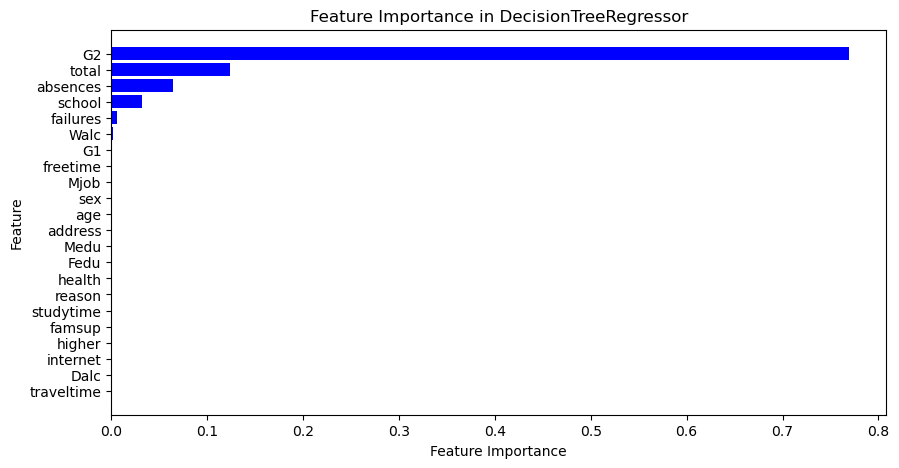

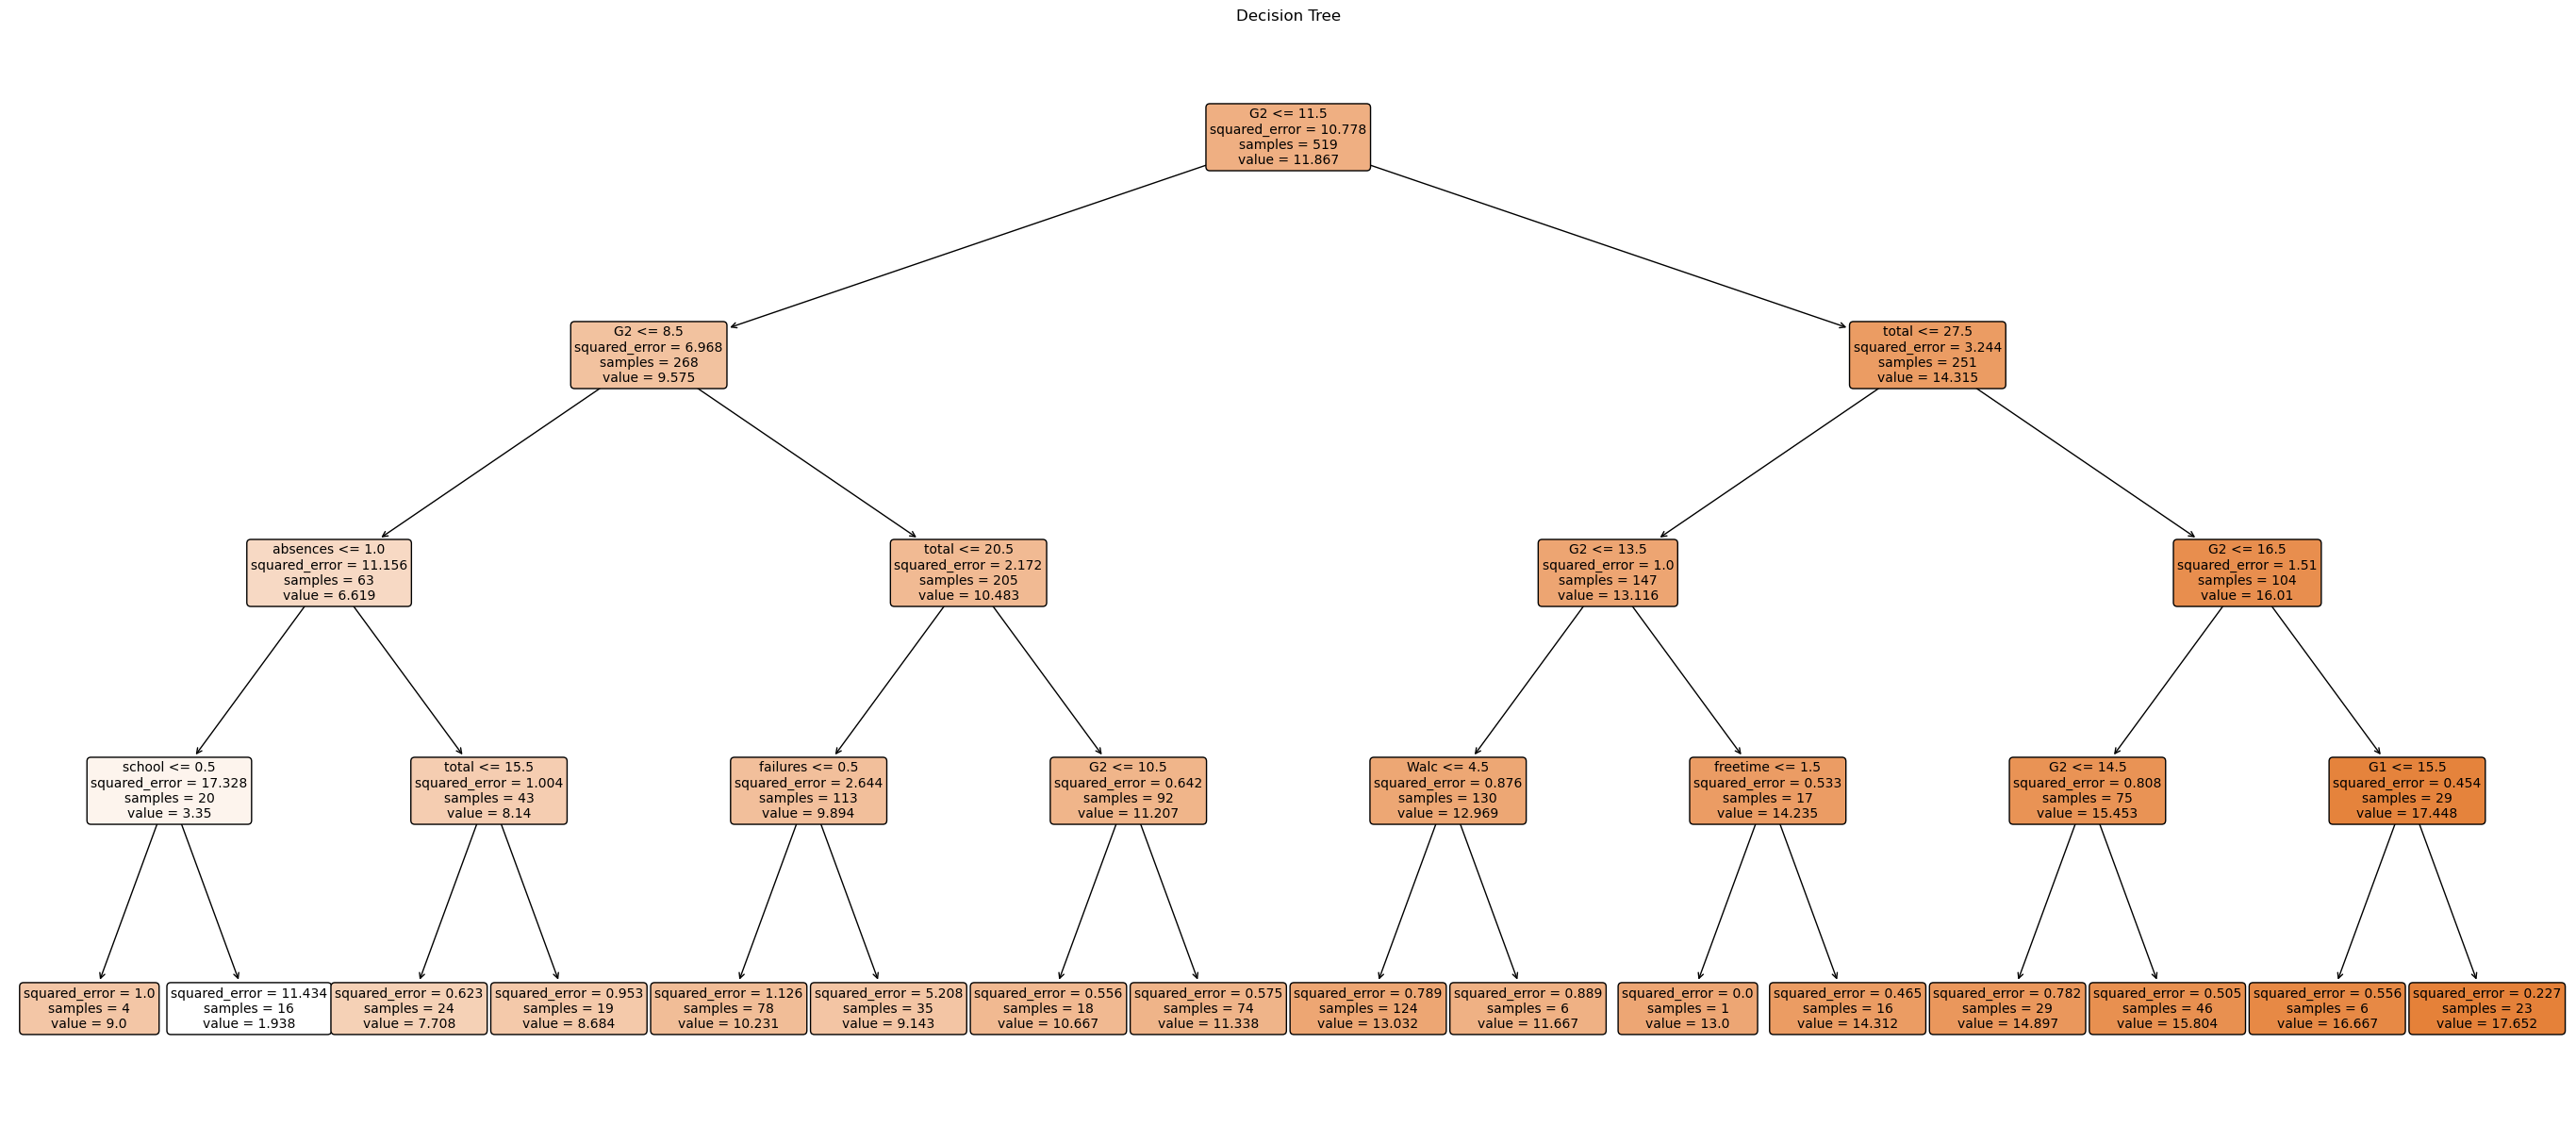

In [23]:
# 6. 변수 중요도 계산 및 시각화

feature_importances = best_dtree.feature_importances_
feature_names = train_X.columns  # train_X의 컬럼 이름 사용

# 변수 중요도를 내림차순으로 정렬
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# 변수 중요도 시각화
plt.figure(figsize=(10, 5))
plt.barh(sorted_feature_names, sorted_feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in DecisionTreeRegressor')
plt.gca().invert_yaxis()  # 가장 중요한 특성이 위로 오도록 역순으로 축 정렬
plt.show()

# 7. 의사결정 트리 시각화
plt.figure(figsize=(35, 15))
plot_tree(best_dtree, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree')
plt.show()